In [5]:
import torch 
import matplotlib.pyplot as plt
from torch import nn

In [6]:
dev = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [9]:
class Generator(nn.Module):

    def __init__(self, z_dim, img_dim):
        super(Generator,self).__init__()

        self.gen = nn.Sequential(
            nn.Linear(z_dim, 256),
            nn.LeakyReLU(0.1),
            nn.Linear(256,img_dim),
            nn.Tanh()
        )

    def forward(self,x):
        return self.gen(x)

gen = Generator(z_dim = 64, img_dim = 784).to(dev)
gen.load_state_dict(torch.load('GAN_models/gen654.pt', map_location=dev))
print(gen)

Generator(
  (gen): Sequential(
    (0): Linear(in_features=64, out_features=256, bias=True)
    (1): LeakyReLU(negative_slope=0.1)
    (2): Linear(in_features=256, out_features=784, bias=True)
    (3): Tanh()
  )
)


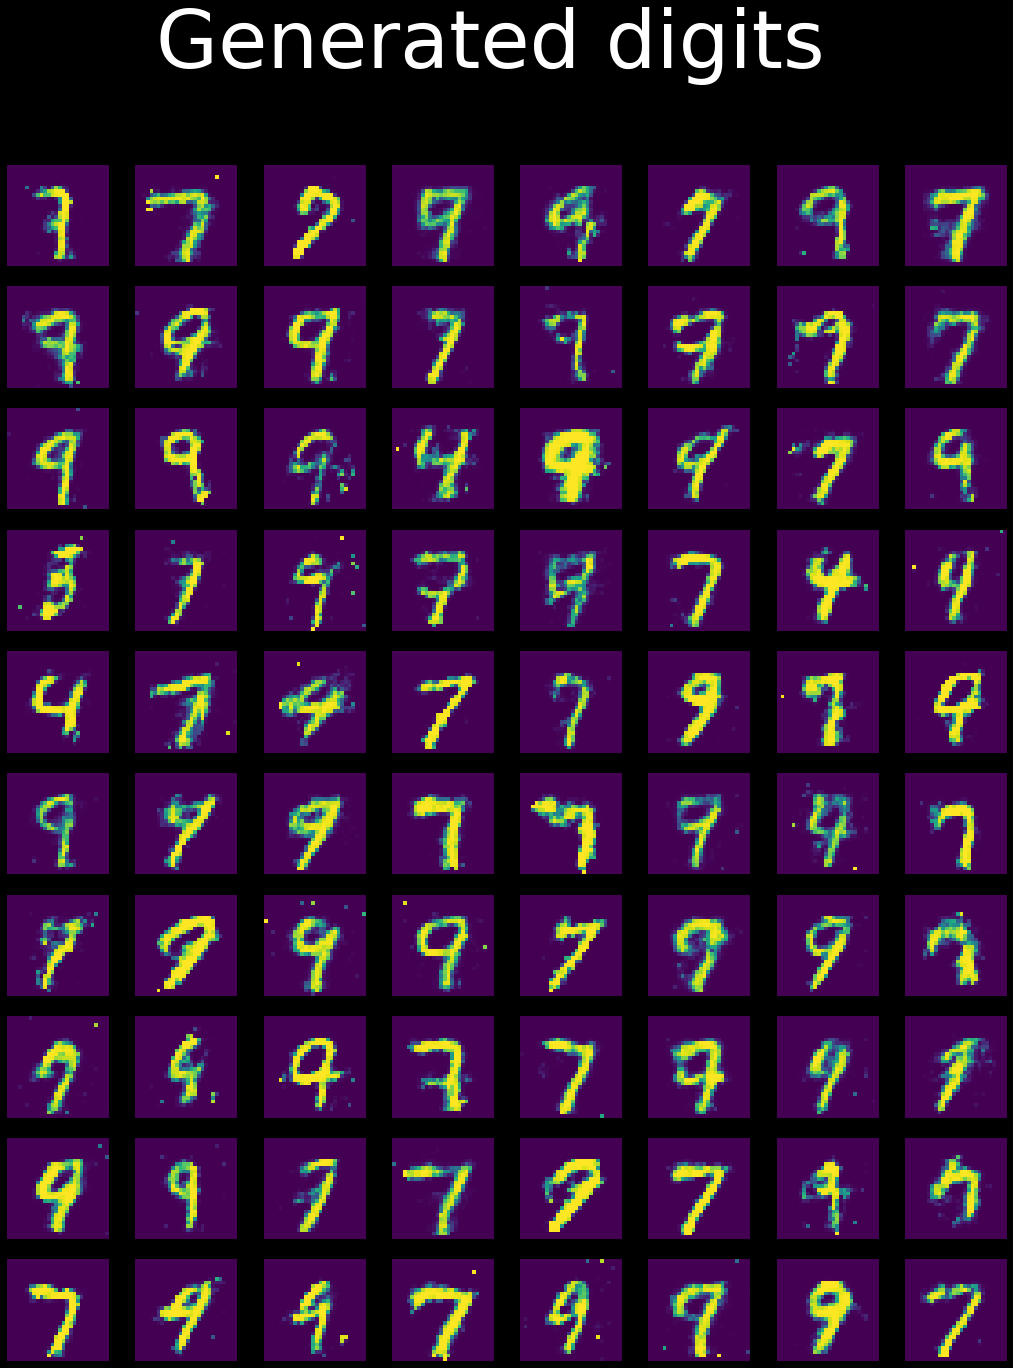

In [46]:
rows = 10
cols = 8
fig,ax = plt.subplots(nrows = rows, ncols = cols, figsize = (18,22))
fig.patch.set_facecolor('black')
ax = ax.flatten()

noise = torch.randn((rows*cols,64))
yhat = gen.forward(noise)
fig.suptitle('Generated digits', size = 80, color='w')

for i in range(len(ax)):
    to_plot = yhat[i].view(28,28).detach()
    ax[i].imshow(to_plot)
    ax[i].axis(False)